In [17]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import boto3

In [18]:
def handler(event, context):
    start_time = event['start_time']
    end_time = event ['end_time']
    region = event['region']
    product_description = event['product_description']
    client = boto3.client('ec2', region_name=region)
    response = client.describe_spot_price_history(
        InstanceTypes=event['instances_list'],
        ProductDescriptions=product_description,
        StartTime=start_time,
        EndTime = end_time,
        MaxResults=10000
    )
    return response['SpotPriceHistory']

In [22]:
def wrapper(instanceList, ProductDescriptionList, region):
    m4_list = []
    for i in range(1,90):
        output = (handler({
        'instances_list': instanceList,
        'start_time': datetime.datetime.now() - datetime.timedelta(i),
        'end_time': datetime.datetime.now() - datetime.timedelta(i-1),
        'product_description': ProductDescriptionList,
        'region': region
    }, ''))
        for j in range(0,len(output)):
            m4_list.append(output[j])

    df = pd.DataFrame(m4_list)
    df = df.drop_duplicates()
    df.reset_index(drop=True,inplace=True)
    return df

In [25]:
df = wrapper(['m4.large', 'm4.xlarge'],['Linux/UNIX (Amazon VPC)'], 'us-west-2')
df

,AvailabilityZone,InstanceType,ProductDescription,SpotPrice,Timestamp
0,us-west-2b,m4.xlarge,Linux/UNIX,0.069400,2025-01-14 02:18:16+00:00
1,us-west-2b,m4.large,Linux/UNIX,0.037500,2025-01-14 02:02:19+00:00
2,us-west-2a,m4.large,Linux/UNIX,0.038600,2025-01-14 01:47:22+00:00
3,us-west-2a,m4.xlarge,Linux/UNIX,0.074100,2025-01-13 23:17:13+00:00
4,us-west-2c,m4.large,Linux/UNIX,0.037200,2025-01-13 23:02:25+00:00
...,...,...,...,...,...
1653,us-west-2c,m4.large,Linux/UNIX,0.032500,2024-10-17 08:02:19+00:00
1654,us-west-2b,m4.xlarge,Linux/UNIX,0.055200,2024-10-17 07:32:10+00:00
1655,us-west-2a,m4.large,Linux/UNIX,0.034400,2024-10-17 06:33:33+00:00
1656,us-west-2a,m4.xlarge,Linux/UNIX,0.057500,2024-10-17 03:02:27+00:00


In [15]:
# df=pd.read_csv('../data/p2-east-1b.csv')
# df.shape

(7182, 5)

In [26]:
df.head()

,AvailabilityZone,InstanceType,ProductDescription,SpotPrice,Timestamp
0,us-west-2b,m4.xlarge,Linux/UNIX,0.069400,2025-01-14 02:18:16+00:00
1,us-west-2b,m4.large,Linux/UNIX,0.037500,2025-01-14 02:02:19+00:00
2,us-west-2a,m4.large,Linux/UNIX,0.038600,2025-01-14 01:47:22+00:00
3,us-west-2a,m4.xlarge,Linux/UNIX,0.074100,2025-01-13 23:17:13+00:00
4,us-west-2c,m4.large,Linux/UNIX,0.037200,2025-01-13 23:02:25+00:00


In [27]:
df.AvailabilityZone.value_counts()

AvailabilityZone
us-west-2c    555
us-west-2b    553
us-west-2a    550
Name: count, dtype: int64

In [28]:
df.ProductDescription.value_counts()

ProductDescription
Linux/UNIX    1658
Name: count, dtype: int64

In [29]:
df.dtypes

AvailabilityZone                       object
InstanceType                           object
ProductDescription                     object
SpotPrice                              object
Timestamp             datetime64[ns, tzutc()]
dtype: object

In [30]:
uwta = df.loc[df['AvailabilityZone'] == 'us-west-2a']
uwta

,AvailabilityZone,InstanceType,ProductDescription,SpotPrice,Timestamp
2,us-west-2a,m4.large,Linux/UNIX,0.038600,2025-01-14 01:47:22+00:00
3,us-west-2a,m4.xlarge,Linux/UNIX,0.074100,2025-01-13 23:17:13+00:00
6,us-west-2a,m4.large,Linux/UNIX,0.038500,2025-01-13 22:01:53+00:00
9,us-west-2a,m4.xlarge,Linux/UNIX,0.073800,2025-01-13 16:18:23+00:00
10,us-west-2a,m4.large,Linux/UNIX,0.038400,2025-01-13 15:33:35+00:00
...,...,...,...,...,...
1647,us-west-2a,m4.large,Linux/UNIX,0.034800,2024-10-17 18:47:49+00:00
1650,us-west-2a,m4.large,Linux/UNIX,0.034300,2024-10-17 13:47:30+00:00
1651,us-west-2a,m4.xlarge,Linux/UNIX,0.057400,2024-10-17 11:47:19+00:00
1655,us-west-2a,m4.large,Linux/UNIX,0.034400,2024-10-17 06:33:33+00:00


In [31]:
uwta_m4 = uwta.loc[uwta['InstanceType'] == 'm4.large']
uwta_m4

,AvailabilityZone,InstanceType,ProductDescription,SpotPrice,Timestamp
2,us-west-2a,m4.large,Linux/UNIX,0.038600,2025-01-14 01:47:22+00:00
6,us-west-2a,m4.large,Linux/UNIX,0.038500,2025-01-13 22:01:53+00:00
10,us-west-2a,m4.large,Linux/UNIX,0.038400,2025-01-13 15:33:35+00:00
13,us-west-2a,m4.large,Linux/UNIX,0.038300,2025-01-13 11:32:14+00:00
19,us-west-2a,m4.large,Linux/UNIX,0.038200,2025-01-13 03:33:35+00:00
...,...,...,...,...,...
1624,us-west-2a,m4.large,Linux/UNIX,0.034900,2024-10-19 00:17:49+00:00
1640,us-west-2a,m4.large,Linux/UNIX,0.034900,2024-10-18 00:17:48+00:00
1647,us-west-2a,m4.large,Linux/UNIX,0.034800,2024-10-17 18:47:49+00:00
1650,us-west-2a,m4.large,Linux/UNIX,0.034300,2024-10-17 13:47:30+00:00


In [32]:
## Setting the timestamp as index for plotting price trends
uwta_m4.set_index('Timestamp',inplace=True)

## dropping other columns 
for col in ['InstanceType', 'AvailabilityZone', 'ProductDescription']:
    uwta_m4 = uwta_m4.drop(col, axis=1)

## Converting the dtype of spot price to numberic
uwta_m4['SpotPrice'] = uwta_m4['SpotPrice'].apply(pd.to_numeric)

## resample the data with the required frequency
uwta_m4_day = uwta_m4.resample('D').mean()

## resampling with frequency hour
uwta_m4_hour = uwta_m4.resample('H').mean()

uwta_m4_hour

/tmp/ipykernel_15570/2118808837.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  uwta_m4_hour = uwta_m4.resample('H').mean()


,SpotPrice
Timestamp,
2024-10-17 06:00:00+00:00,0.0344
2024-10-17 07:00:00+00:00,NaN
2024-10-17 08:00:00+00:00,NaN
2024-10-17 09:00:00+00:00,NaN
2024-10-17 10:00:00+00:00,NaN
...,...
2025-01-13 21:00:00+00:00,NaN
2025-01-13 22:00:00+00:00,0.0385
2025-01-13 23:00:00+00:00,NaN


In [33]:
uwta_m4_hour.fillna(method='ffill',inplace=True)
uwta_m4_hour

/tmp/ipykernel_15570/321349966.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  uwta_m4_hour.fillna(method='ffill',inplace=True)


,SpotPrice
Timestamp,
2024-10-17 06:00:00+00:00,0.0344
2024-10-17 07:00:00+00:00,0.0344
2024-10-17 08:00:00+00:00,0.0344
2024-10-17 09:00:00+00:00,0.0344
2024-10-17 10:00:00+00:00,0.0344
...,...
2025-01-13 21:00:00+00:00,0.0384
2025-01-13 22:00:00+00:00,0.0385
2025-01-13 23:00:00+00:00,0.0385


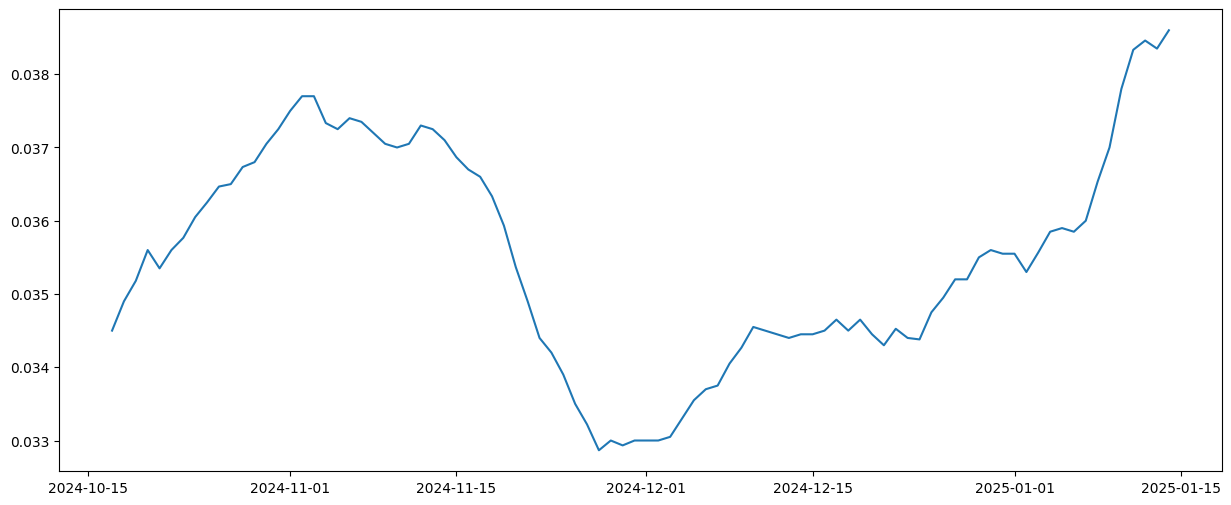

In [34]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

## plotting for the day frequency; remember we did not fill the values for day frequency
plt.plot(uwta_m4_day)

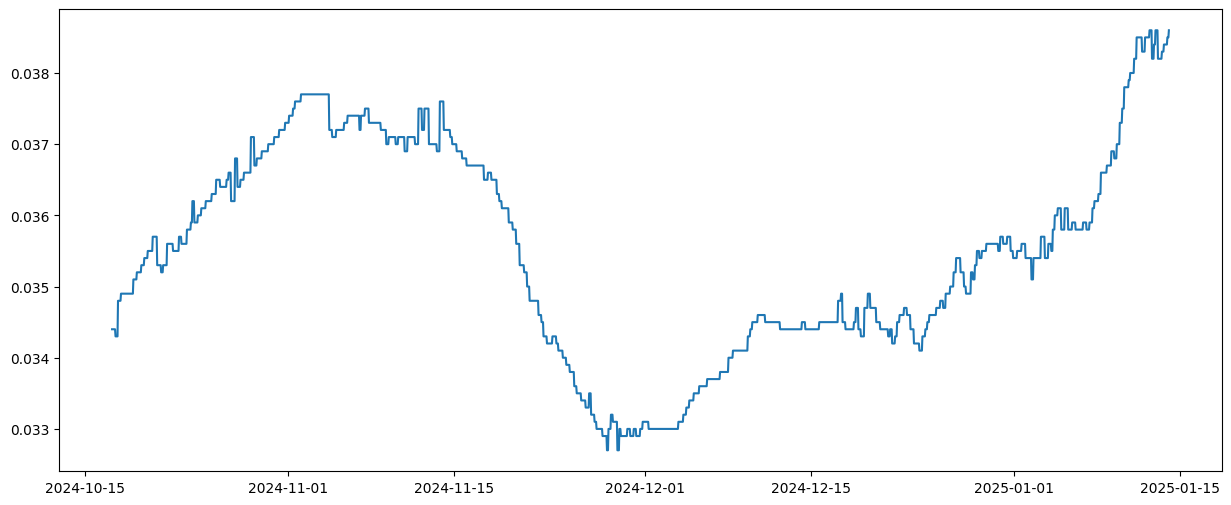

In [35]:
plt.plot(uwta_m4_hour)

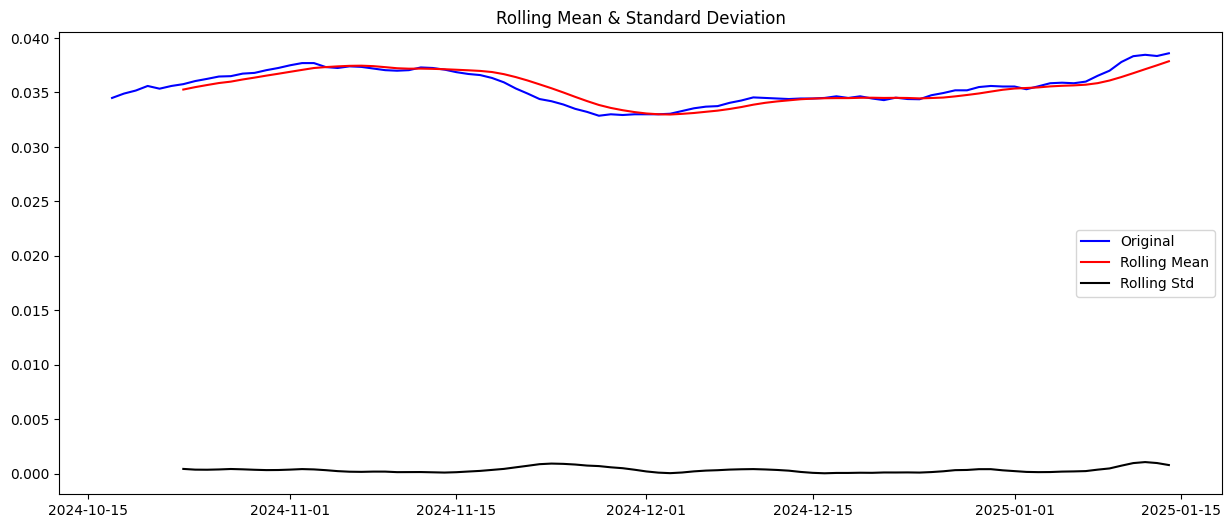

In [36]:
## Rolling statistics
rolmean = uwta_m4_day.rolling(window = 7).mean()
rolstd = uwta_m4_day.rolling(window = 7).std()

## plot the results
orig = plt.plot(uwta_m4_day, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Test for stationarity   
We can test the data for stationarity using the dickney Fuller test.



In [38]:
## Dickney Fuller test for stationarity
from statsmodels.tsa.stattools import adfuller

x = uwta_m4_day.SpotPrice
x

Timestamp
2024-10-17 00:00:00+00:00    0.034500
2024-10-18 00:00:00+00:00    0.034900
2024-10-19 00:00:00+00:00    0.035180
2024-10-20 00:00:00+00:00    0.035600
2024-10-21 00:00:00+00:00    0.035350
                               ...   
2025-01-10 00:00:00+00:00    0.037800
2025-01-11 00:00:00+00:00    0.038333
2025-01-12 00:00:00+00:00    0.038460
2025-01-13 00:00:00+00:00    0.038350
2025-01-14 00:00:00+00:00    0.038600
Freq: D, Name: SpotPrice, Length: 90, dtype: float64

In [39]:
res = adfuller(x)

In [40]:
dfoutput = pd.Series(res[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in res[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                 -1.910780
p-value                         0.327007
#Lags Used                      5.000000
Number of Observations Used    84.000000
Critical Value (1%)            -3.510712
Critical Value (5%)            -2.896616
Critical Value (10%)           -2.585482
dtype: float64


From the results we can be sure that the data we have is not stationary.